# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env_file_name = "Tennis_Windows_x86_64/Tennis.exe"
# env = UnityEnvironment(file_name=env_file_name)
env = UnityEnvironment(file_name=env_file_name,no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('states shape : ',states.shape)
print('Both states look like : ',states)
print(2*states)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
states shape :  (2, 24)
Both states look like :  [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.65278625 -1.5
  -0.          0.          6.83172083  6.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.4669857  -1.5
   0.          0.         -6.83172083  6.          0.          0.

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
if False:
    total_scores = []
    for i in range(100):                                        # play game for 5 episodes
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        t = 0
        while True:
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            # print('actions : ',actions)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            t += 1
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        print('Score (max over agents) from episode {}: {}, and {} steps taken'.format(i, np.max(scores),t))
        print(scores)
        total_scores.append(scores)
    print('Average Random Score : ', np.mean(total_scores))
        
def plot_results(results):
    import matplotlib.pyplot as plt
    import torch
    plt.ion()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.all_rewards)), [np.sum(ar) for ar in results.all_rewards])
    plt.plot(np.arange(len(results.avg_rewards)), results.avg_rewards)
    plt.ylabel('Rewards')
    plt.xlabel('Episode #')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.critic_loss)), results.critic_loss)
    plt.ylabel('critic_losses')
    plt.xlabel('Learn Step #')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.actor_loss)), results.actor_loss)
    plt.ylabel('actor_losses')
    plt.xlabel('Learn Step #')
    plt.show()


When finished, you can close the environment.

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 256
buffer_size          : 50000
batch_size           : 256
seed                 : 8
max_episodes         : 3000
dropout              : 0.01
learn_every          : 2
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.9999
sigma                : 0.6
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
Running on device :  cpu


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 0 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  1.000 || 0.108 seconds, mem : 15


Episode 20 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.998 || 0.314 seconds, mem : 299


Episode 40 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.996 || 0.178 seconds, mem : 583


Episode 60 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.994 || 0.164 seconds, mem : 867


Episode 80 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.992 || 0.123 seconds, mem : 1151


Episode 100 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.990 || 0.123 seconds, mem : 1435


Episode 120 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.988 || 0.116 seconds, mem : 1719


Episode 140 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.986 || 0.219 seconds, mem : 2003


Episode 160 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.984 || 0.247 seconds, mem : 2287


Episode 180 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.982 || 0.208 seconds, mem : 2571


Episode 200 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.980 || 0.213 seconds, mem : 2855


Episode 220 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.978 || 0.191 seconds, mem : 3139


Episode 240 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.976 || 0.207 seconds, mem : 3423


Episode 260 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.974 || 0.201 seconds, mem : 3707


Episode 280 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.972 || 0.125 seconds, mem : 3991


Episode 300 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.970 || 0.215 seconds, mem : 4275


Episode 318 with 32 steps || Reward : [0.   0.09] || avg reward :  0.001 || Noise  0.969 || 0.369 seconds, mem : 4553
Episode 320 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.968 || 0.176 seconds, mem : 4581


Episode 334 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.002 || Noise  0.967 || 0.357 seconds, mem : 4796


Episode 336 with 30 steps || Reward : [0.   0.09] || avg reward :  0.003 || Noise  0.967 || 0.348 seconds, mem : 4840
Episode 340 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.003 || Noise  0.966 || 0.194 seconds, mem : 4897


Episode 351 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.004 || Noise  0.965 || 0.189 seconds, mem : 5069


Episode 360 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.004 || Noise  0.965 || 0.196 seconds, mem : 5196
Episode 362 with 32 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.964 || 0.332 seconds, mem : 5242
Episode 363 with 30 steps || Reward : [0.   0.09] || avg reward :  0.006 || Noise  0.964 || 0.183 seconds, mem : 5272


Episode 367 with 18 steps || Reward : [ 0.1  -0.01] || avg reward :  0.007 || Noise  0.964 || 0.120 seconds, mem : 5333


Episode 373 with 31 steps || Reward : [0.   0.09] || avg reward :  0.008 || Noise  0.963 || 0.204 seconds, mem : 5435


Episode 379 with 32 steps || Reward : [0.   0.09] || avg reward :  0.008 || Noise  0.963 || 0.169 seconds, mem : 5543
Episode 380 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.008 || Noise  0.963 || 0.165 seconds, mem : 5557


Episode 387 with 32 steps || Reward : [0.1  0.09] || avg reward :  0.009 || Noise  0.962 || 0.199 seconds, mem : 5674


Episode 389 with 30 steps || Reward : [0.   0.09] || avg reward :  0.010 || Noise  0.962 || 0.188 seconds, mem : 5725


Episode 400 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.010 || Noise  0.961 || 0.213 seconds, mem : 5881


Episode 407 with 31 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.960 || 0.217 seconds, mem : 5997


Episode 410 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.012 || Noise  0.960 || 0.320 seconds, mem : 6067
Episode 412 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.013 || Noise  0.960 || 0.333 seconds, mem : 6109


Episode 415 with 30 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.959 || 0.171 seconds, mem : 6168


Episode 420 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.013 || Noise  0.959 || 0.203 seconds, mem : 6239
Episode 422 with 30 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.959 || 0.668 seconds, mem : 6285


Episode 426 with 31 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.958 || 0.348 seconds, mem : 6358
Episode 427 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.016 || Noise  0.958 || 0.220 seconds, mem : 6391


Episode 436 with 30 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.957 || 0.267 seconds, mem : 6534


Episode 439 with 39 steps || Reward : [-0.01  0.1 ] || avg reward :  0.016 || Noise  0.957 || 0.252 seconds, mem : 6602
Episode 440 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.016 || Noise  0.957 || 0.196 seconds, mem : 6616


Episode 444 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.956 || 0.278 seconds, mem : 6690


Episode 450 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.956 || 0.604 seconds, mem : 6790
Episode 453 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.956 || 0.230 seconds, mem : 6849


Episode 455 with 31 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.955 || 0.160 seconds, mem : 6895
Episode 457 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.955 || 0.182 seconds, mem : 6939
Episode 459 with 31 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.955 || 0.195 seconds, mem : 6984


Episode 460 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.955 || 0.287 seconds, mem : 7013
Episode 461 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.955 || 0.173 seconds, mem : 7044
Episode 463 with 30 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.955 || 0.185 seconds, mem : 7088


Episode 468 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.954 || 0.432 seconds, mem : 7188
Episode 469 with 30 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.954 || 0.135 seconds, mem : 7218


Episode 472 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.954 || 0.286 seconds, mem : 7277


Episode 479 with 29 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.953 || 0.214 seconds, mem : 7391
Episode 480 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.022 || Noise  0.953 || 0.231 seconds, mem : 7405


Episode 485 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.953 || 0.175 seconds, mem : 7492


Episode 486 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.952 || 0.475 seconds, mem : 7523


Episode 492 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.023 || Noise  0.952 || 0.489 seconds, mem : 7647


Episode 498 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.951 || 0.398 seconds, mem : 7748
Episode 500 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.024 || Noise  0.951 || 0.199 seconds, mem : 7777


Episode 507 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.024 || Noise  0.950 || 0.199 seconds, mem : 7903


Episode 510 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.950 || 0.310 seconds, mem : 7963
Episode 514 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.950 || 0.160 seconds, mem : 8036


Episode 520 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.023 || Noise  0.949 || 0.114 seconds, mem : 8121
Episode 524 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.949 || 0.164 seconds, mem : 8194
Episode 525 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.949 || 0.112 seconds, mem : 8225
Episode 527 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.949 || 0.139 seconds, mem : 8270


Episode 535 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.948 || 0.192 seconds, mem : 8399


Episode 540 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.022 || Noise  0.947 || 0.262 seconds, mem : 8470


Episode 548 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.022 || Noise  0.947 || 0.345 seconds, mem : 8603


Episode 552 with 30 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.946 || 0.349 seconds, mem : 8676
Episode 554 with 32 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.946 || 0.317 seconds, mem : 8722


Episode 557 with 32 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.946 || 0.228 seconds, mem : 8799
Episode 560 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.019 || Noise  0.945 || 0.187 seconds, mem : 8841


Episode 569 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.017 || Noise  0.945 || 0.254 seconds, mem : 8998


Episode 574 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.944 || 0.359 seconds, mem : 9086
Episode 579 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.944 || 0.199 seconds, mem : 9172


Episode 580 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.017 || Noise  0.944 || 0.317 seconds, mem : 9187


Episode 584 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.943 || 0.532 seconds, mem : 9257
Episode 585 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.943 || 0.331 seconds, mem : 9288


Episode 591 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.943 || 0.366 seconds, mem : 9400


Episode 596 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.942 || 0.313 seconds, mem : 9488
Episode 599 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.942 || 0.289 seconds, mem : 9545
Episode 600 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.018 || Noise  0.942 || 0.261 seconds, mem : 9559


Episode 601 with 32 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.942 || 0.254 seconds, mem : 9591


Episode 606 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.020 || Noise  0.941 || 0.350 seconds, mem : 9679
Episode 608 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.941 || 0.420 seconds, mem : 9724


Episode 610 with 32 steps || Reward : [0.1  0.09] || avg reward :  0.020 || Noise  0.941 || 0.431 seconds, mem : 9771
Episode 612 with 31 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.941 || 0.367 seconds, mem : 9817


Episode 615 with 31 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.940 || 0.266 seconds, mem : 9876


Episode 620 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.021 || Noise  0.940 || 0.484 seconds, mem : 9946
Episode 621 with 31 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.940 || 0.226 seconds, mem : 9977
Episode 622 with 32 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.940 || 0.483 seconds, mem : 10009


Episode 625 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.939 || 0.266 seconds, mem : 10067


Episode 630 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.939 || 0.405 seconds, mem : 10161


Episode 636 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.938 || 0.310 seconds, mem : 10263


Episode 639 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.938 || 0.635 seconds, mem : 10323
Episode 640 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.022 || Noise  0.938 || 0.177 seconds, mem : 10337


Episode 642 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.938 || 0.264 seconds, mem : 10382
Episode 647 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.937 || 0.214 seconds, mem : 10469


Episode 657 with 29 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.936 || 0.251 seconds, mem : 10626
Episode 660 with 30 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.936 || 0.268 seconds, mem : 10685


Episode 662 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.023 || Noise  0.936 || 0.202 seconds, mem : 10725


Episode 669 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.023 || Noise  0.935 || 0.163 seconds, mem : 10838


Episode 677 with 29 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.934 || 0.174 seconds, mem : 10966


Episode 680 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.022 || Noise  0.934 || 0.220 seconds, mem : 11009


Episode 686 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.934 || 0.344 seconds, mem : 11117
Episode 689 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.022 || Noise  0.933 || 0.173 seconds, mem : 11179


Episode 700 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.020 || Noise  0.932 || 0.177 seconds, mem : 11338
Episode 702 with 32 steps || Reward : [0.1  0.09] || avg reward :  0.020 || Noise  0.932 || 0.291 seconds, mem : 11384
Episode 704 with 29 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.932 || 0.345 seconds, mem : 11427


Episode 706 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.932 || 0.299 seconds, mem : 11472


Episode 716 with 30 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.931 || 0.413 seconds, mem : 11637


Episode 720 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.018 || Noise  0.930 || 0.187 seconds, mem : 11694


Episode 724 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.930 || 0.350 seconds, mem : 11767
Episode 725 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.930 || 0.266 seconds, mem : 11797
Episode 727 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.930 || 0.300 seconds, mem : 11842


Episode 733 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.929 || 0.322 seconds, mem : 11944


Episode 740 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.929 || 0.322 seconds, mem : 12060


Episode 741 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.928 || 0.229 seconds, mem : 12093


Episode 752 with 29 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.927 || 0.335 seconds, mem : 12264


Episode 756 with 30 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.927 || 0.183 seconds, mem : 12337
Episode 757 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.927 || 0.096 seconds, mem : 12363
Episode 759 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.927 || 0.109 seconds, mem : 12406
Episode 760 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.018 || Noise  0.927 || 0.116 seconds, mem : 12420


Episode 768 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.926 || 0.188 seconds, mem : 12550
Episode 771 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.926 || 0.136 seconds, mem : 12610


Episode 780 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.017 || Noise  0.925 || 0.235 seconds, mem : 12738
Episode 782 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.925 || 0.309 seconds, mem : 12784
Episode 785 with 24 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.924 || 0.129 seconds, mem : 12836


Episode 789 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.924 || 0.343 seconds, mem : 12910


Episode 795 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.923 || 0.205 seconds, mem : 13013


Episode 797 with 32 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.923 || 0.202 seconds, mem : 13059
Episode 800 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.019 || Noise  0.923 || 0.300 seconds, mem : 13102


Episode 810 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.922 || 0.579 seconds, mem : 13257


Episode 820 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.017 || Noise  0.921 || 0.483 seconds, mem : 13409


Episode 826 with 29 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.921 || 1.699 seconds, mem : 13509


Episode 829 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.016 || Noise  0.920 || 0.259 seconds, mem : 13564


Episode 834 with 31 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.920 || 0.295 seconds, mem : 13652


Episode 840 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.015 || Noise  0.919 || 0.307 seconds, mem : 13737


Episode 845 with 33 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.919 || 0.499 seconds, mem : 13827


Episode 860 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.011 || Noise  0.917 || 0.233 seconds, mem : 14040


Episode 865 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.012 || Noise  0.917 || 0.248 seconds, mem : 14137
Episode 866 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.013 || Noise  0.917 || 0.315 seconds, mem : 14164


Episode 876 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.012 || Noise  0.916 || 0.349 seconds, mem : 14322


Episode 880 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.012 || Noise  0.916 || 0.234 seconds, mem : 14379
Episode 881 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.013 || Noise  0.916 || 0.200 seconds, mem : 14408


Episode 890 with 30 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.915 || 0.292 seconds, mem : 14552
Episode 893 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.013 || Noise  0.914 || 0.205 seconds, mem : 14608


Episode 899 with 29 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.914 || 0.215 seconds, mem : 14708
Episode 900 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.012 || Noise  0.914 || 0.243 seconds, mem : 14722


Episode 905 with 30 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.913 || 0.213 seconds, mem : 14809


Episode 914 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.012 || Noise  0.913 || 0.397 seconds, mem : 14970


Episode 920 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.912 || 0.267 seconds, mem : 15055
Episode 923 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.013 || Noise  0.912 || 0.187 seconds, mem : 15111


Episode 928 with 30 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.911 || 0.318 seconds, mem : 15198
Episode 929 with 30 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.911 || 0.197 seconds, mem : 15228


Episode 932 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.014 || Noise  0.911 || 0.368 seconds, mem : 15290


Episode 939 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.910 || 0.285 seconds, mem : 15406


Episode 940 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.014 || Noise  0.910 || 0.379 seconds, mem : 15420
Episode 941 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.015 || Noise  0.910 || 0.214 seconds, mem : 15449


Episode 944 with 30 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.910 || 0.616 seconds, mem : 15507


Episode 945 with 32 steps || Reward : [0.1  0.09] || avg reward :  0.016 || Noise  0.910 || 0.862 seconds, mem : 15539


Episode 946 with 33 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.910 || 2.430 seconds, mem : 15572


Episode 949 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.909 || 0.505 seconds, mem : 15642


Episode 953 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.909 || 0.251 seconds, mem : 15713


Episode 955 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.909 || 0.214 seconds, mem : 15758


Episode 959 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.908 || 0.233 seconds, mem : 15831
Episode 960 with 31 steps || Reward : [-0.02  0.1 ] || avg reward :  0.022 || Noise  0.908 || 0.483 seconds, mem : 15862


Episode 963 with 39 steps || Reward : [0.1  0.09] || avg reward :  0.023 || Noise  0.908 || 0.215 seconds, mem : 15929


Episode 970 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.907 || 0.326 seconds, mem : 16045
Episode 971 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.907 || 0.263 seconds, mem : 16075
Episode 974 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.907 || 0.284 seconds, mem : 16134


Episode 980 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.023 || Noise  0.907 || 0.180 seconds, mem : 16220


Episode 987 with 32 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.906 || 0.180 seconds, mem : 16339


Episode 997 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.905 || 0.167 seconds, mem : 16494
Episode 998 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.905 || 0.302 seconds, mem : 16524
Episode 1000 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.022 || Noise  0.905 || 0.231 seconds, mem : 16552


Episode 1002 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.905 || 0.318 seconds, mem : 16596
Episode 1004 with 49 steps || Reward : [0.1  0.09] || avg reward :  0.024 || Noise  0.904 || 0.446 seconds, mem : 16659
Episode 1007 with 29 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.904 || 0.118 seconds, mem : 16717


Episode 1008 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.904 || 0.294 seconds, mem : 16747


Episode 1016 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.025 || Noise  0.903 || 0.370 seconds, mem : 16879


Episode 1018 with 30 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.903 || 0.495 seconds, mem : 16923
Episode 1020 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.025 || Noise  0.903 || 0.434 seconds, mem : 16951


Episode 1024 with 32 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.903 || 0.682 seconds, mem : 17026


Episode 1031 with 33 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.902 || 0.200 seconds, mem : 17144


Episode 1033 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.902 || 0.222 seconds, mem : 17188


Episode 1037 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.901 || 0.234 seconds, mem : 17261
Episode 1040 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.024 || Noise  0.901 || 0.271 seconds, mem : 17304
Episode 1041 with 29 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.901 || 0.179 seconds, mem : 17333


Episode 1043 with 30 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.901 || 0.206 seconds, mem : 17377
Episode 1045 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.901 || 0.333 seconds, mem : 17421


Episode 1046 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.901 || 0.441 seconds, mem : 17451


Episode 1051 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.024 || Noise  0.900 || 0.267 seconds, mem : 17535
Episode 1053 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.900 || 0.235 seconds, mem : 17580


Episode 1055 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.024 || Noise  0.900 || 0.546 seconds, mem : 17627
Episode 1056 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.900 || 0.420 seconds, mem : 17658


Episode 1060 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.899 || 0.394 seconds, mem : 17731
Episode 1062 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.899 || 0.430 seconds, mem : 17777


Episode 1063 with 30 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.899 || 1.070 seconds, mem : 17807


Episode 1064 with 31 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.899 || 1.060 seconds, mem : 17838


Episode 1080 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.023 || Noise  0.898 || 1.034 seconds, mem : 18065


Episode 1082 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.897 || 0.813 seconds, mem : 18110
Episode 1084 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.897 || 0.210 seconds, mem : 18155
Episode 1085 with 32 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.897 || 0.122 seconds, mem : 18187
Episode 1086 with 30 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.897 || 0.200 seconds, mem : 18217


Episode 1093 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.027 || Noise  0.896 || 0.256 seconds, mem : 18335


Episode 1100 with 32 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.896 || 0.365 seconds, mem : 18463
Episode 1102 with 31 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.896 || 0.422 seconds, mem : 18508


Episode 1110 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.895 || 0.749 seconds, mem : 18638


Episode 1114 with 30 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.894 || 0.563 seconds, mem : 18710


Episode 1116 with 43 steps || Reward : [0.1  0.09] || avg reward :  0.025 || Noise  0.894 || 0.896 seconds, mem : 18767


Episode 1118 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.894 || 1.572 seconds, mem : 18812


Episode 1120 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.025 || Noise  0.894 || 0.849 seconds, mem : 18840


Episode 1130 with 30 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.893 || 0.469 seconds, mem : 18998
Episode 1133 with 33 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.893 || 0.285 seconds, mem : 19059


Episode 1139 with 42 steps || Reward : [0.1  0.09] || avg reward :  0.024 || Noise  0.892 || 0.419 seconds, mem : 19171
Episode 1140 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.892 || 0.482 seconds, mem : 19200


Episode 1141 with 30 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.892 || 0.258 seconds, mem : 19230


Episode 1150 with 30 steps || Reward : [-0.02  0.1 ] || avg reward :  0.023 || Noise  0.891 || 0.400 seconds, mem : 19373
Episode 1153 with 29 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.891 || 0.235 seconds, mem : 19431


Episode 1156 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.021 || Noise  0.891 || 0.465 seconds, mem : 19493


Episode 1160 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.020 || Noise  0.890 || 0.253 seconds, mem : 19550
Episode 1162 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.021 || Noise  0.890 || 0.382 seconds, mem : 19597
Episode 1163 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.890 || 0.258 seconds, mem : 19627


Episode 1170 with 31 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.889 || 0.334 seconds, mem : 19743
Episode 1172 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.889 || 0.429 seconds, mem : 19787


Episode 1177 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.023 || Noise  0.889 || 0.259 seconds, mem : 19877


Episode 1180 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.889 || 0.394 seconds, mem : 19936
Episode 1181 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.024 || Noise  0.889 || 0.252 seconds, mem : 19962
Episode 1182 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.888 || 0.334 seconds, mem : 19992
Episode 1183 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.888 || 0.196 seconds, mem : 20023


Episode 1186 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.024 || Noise  0.888 || 0.329 seconds, mem : 20085
Episode 1187 with 25 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.888 || 0.151 seconds, mem : 20110


Episode 1192 with 32 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.888 || 0.311 seconds, mem : 20199


Episode 1194 with 24 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.887 || 0.388 seconds, mem : 20237


Episode 1200 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.025 || Noise  0.887 || 0.270 seconds, mem : 20323
Episode 1202 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.887 || 0.299 seconds, mem : 20365


Episode 1209 with 32 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.886 || 0.209 seconds, mem : 20482
Episode 1210 with 31 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.886 || 0.412 seconds, mem : 20513


Episode 1211 with 37 steps || Reward : [-0.01  0.1 ] || avg reward :  0.027 || Noise  0.886 || 0.231 seconds, mem : 20550
Episode 1212 with 32 steps || Reward : [0.1  0.09] || avg reward :  0.028 || Noise  0.886 || 0.354 seconds, mem : 20582
Episode 1213 with 31 steps || Reward : [0.   0.09] || avg reward :  0.029 || Noise  0.886 || 0.303 seconds, mem : 20613


Episode 1220 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.026 || Noise  0.885 || 0.200 seconds, mem : 20714


Episode 1227 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.027 || Noise  0.884 || 0.185 seconds, mem : 20830
Episode 1230 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.027 || Noise  0.884 || 0.351 seconds, mem : 20891
Episode 1231 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.028 || Noise  0.884 || 0.166 seconds, mem : 20919


Episode 1235 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.028 || Noise  0.884 || 0.319 seconds, mem : 20991


Episode 1239 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.883 || 0.232 seconds, mem : 21066
Episode 1240 with 32 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.883 || 0.348 seconds, mem : 21098


Episode 1244 with 30 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.883 || 0.398 seconds, mem : 21170


Episode 1254 with 30 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.882 || 0.383 seconds, mem : 21328
Episode 1255 with 31 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.882 || 0.198 seconds, mem : 21359


Episode 1256 with 34 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.882 || 0.629 seconds, mem : 21393
Episode 1260 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.028 || Noise  0.882 || 0.246 seconds, mem : 21450


Episode 1263 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.027 || Noise  0.881 || 0.224 seconds, mem : 21512
Episode 1265 with 32 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.881 || 0.231 seconds, mem : 21558


Episode 1280 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.024 || Noise  0.880 || 0.196 seconds, mem : 21770


Episode 1295 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.878 || 0.116 seconds, mem : 22015


Episode 1300 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.018 || Noise  0.878 || 0.307 seconds, mem : 22086


Episode 1307 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.877 || 0.226 seconds, mem : 22203


Episode 1308 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.877 || 0.472 seconds, mem : 22233


Episode 1317 with 32 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.877 || 0.228 seconds, mem : 22388


Episode 1320 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.015 || Noise  0.876 || 0.213 seconds, mem : 22431


Episode 1322 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.016 || Noise  0.876 || 0.606 seconds, mem : 22477


Episode 1330 with 31 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.875 || 0.446 seconds, mem : 22607


Episode 1332 with 30 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.875 || 0.328 seconds, mem : 22651


Episode 1340 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.012 || Noise  0.874 || 0.281 seconds, mem : 22764


Episode 1348 with 25 steps || Reward : [-0.01  0.1 ] || avg reward :  0.012 || Noise  0.874 || 0.400 seconds, mem : 22894


Episode 1352 with 32 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.873 || 0.417 seconds, mem : 22969


Episode 1360 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.010 || Noise  0.873 || 0.213 seconds, mem : 23082


Episode 1368 with 32 steps || Reward : [0.   0.09] || avg reward :  0.009 || Noise  0.872 || 0.353 seconds, mem : 23224


Episode 1375 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.010 || Noise  0.871 || 0.245 seconds, mem : 23357
Episode 1377 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.011 || Noise  0.871 || 0.199 seconds, mem : 23399


Episode 1379 with 29 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.871 || 0.188 seconds, mem : 23443
Episode 1380 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.871 || 0.278 seconds, mem : 23457


Episode 1387 with 31 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.870 || 0.195 seconds, mem : 23573


Episode 1400 with 30 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.869 || 0.615 seconds, mem : 23773


Episode 1404 with 30 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.869 || 0.366 seconds, mem : 23846


Episode 1411 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.013 || Noise  0.868 || 0.258 seconds, mem : 23961
Episode 1412 with 30 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.868 || 0.398 seconds, mem : 23991


Episode 1416 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.015 || Noise  0.868 || 0.432 seconds, mem : 24068
Episode 1417 with 32 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.868 || 0.255 seconds, mem : 24100


Episode 1420 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.015 || Noise  0.868 || 0.231 seconds, mem : 24143
Episode 1421 with 31 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.867 || 0.116 seconds, mem : 24174


Episode 1428 with 31 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.867 || 0.429 seconds, mem : 24290


Episode 1435 with 31 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.866 || 0.222 seconds, mem : 24418
Episode 1437 with 31 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.866 || 0.212 seconds, mem : 24464


Episode 1438 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.017 || Noise  0.866 || 0.370 seconds, mem : 24498
Episode 1440 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.017 || Noise  0.866 || 0.311 seconds, mem : 24526
Episode 1443 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.866 || 0.191 seconds, mem : 24586


Episode 1446 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.019 || Noise  0.865 || 0.544 seconds, mem : 24647


Episode 1451 with 34 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.865 || 0.183 seconds, mem : 24738


Episode 1459 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.864 || 0.244 seconds, mem : 24867
Episode 1460 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.019 || Noise  0.864 || 0.196 seconds, mem : 24881


Episode 1461 with 32 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.864 || 0.234 seconds, mem : 24913


Episode 1476 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.863 || 0.327 seconds, mem : 25142


Episode 1479 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.862 || 0.335 seconds, mem : 25198
Episode 1480 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.018 || Noise  0.862 || 0.309 seconds, mem : 25212


Episode 1489 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.862 || 0.389 seconds, mem : 25357


Episode 1495 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.861 || 0.165 seconds, mem : 25454
Episode 1496 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.861 || 0.347 seconds, mem : 25484


Episode 1499 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.021 || Noise  0.861 || 0.213 seconds, mem : 25546
Episode 1500 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.020 || Noise  0.861 || 0.200 seconds, mem : 25560


Episode 1503 with 31 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.860 || 0.294 seconds, mem : 25619
Episode 1507 with 33 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.860 || 0.227 seconds, mem : 25694


Episode 1515 with 33 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.859 || 0.288 seconds, mem : 25826


Episode 1520 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.859 || 0.307 seconds, mem : 25909
Episode 1521 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.859 || 0.295 seconds, mem : 25937


Episode 1525 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.858 || 0.266 seconds, mem : 26010


Episode 1528 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.858 || 0.369 seconds, mem : 26069


Episode 1540 with 33 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.857 || 0.398 seconds, mem : 26264
Episode 1541 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.857 || 0.200 seconds, mem : 26294


Episode 1545 with 31 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.857 || 0.242 seconds, mem : 26367


Episode 1546 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.019 || Noise  0.857 || 0.388 seconds, mem : 26401


Episode 1558 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.856 || 0.350 seconds, mem : 26596


Episode 1560 with 31 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.855 || 0.366 seconds, mem : 26641
Episode 1561 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.855 || 0.171 seconds, mem : 26669
Episode 1564 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.855 || 0.432 seconds, mem : 26728
Episode 1565 with 32 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.855 || 0.217 seconds, mem : 26760


Episode 1567 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.855 || 0.271 seconds, mem : 26805
Episode 1568 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.855 || 0.571 seconds, mem : 26836


Episode 1577 with 33 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.854 || 0.255 seconds, mem : 26985


Episode 1578 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.023 || Noise  0.854 || 1.598 seconds, mem : 27014
Episode 1580 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.854 || 0.724 seconds, mem : 27059


Episode 1584 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.853 || 0.613 seconds, mem : 27132


Episode 1593 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.853 || 0.245 seconds, mem : 27276


Episode 1594 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.853 || 0.402 seconds, mem : 27303


Episode 1600 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.022 || Noise  0.852 || 0.335 seconds, mem : 27400


Episode 1604 with 30 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.852 || 0.418 seconds, mem : 27473


Episode 1610 with 32 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.851 || 0.417 seconds, mem : 27576


Episode 1612 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.023 || Noise  0.851 || 0.345 seconds, mem : 27623
Episode 1616 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.851 || 0.358 seconds, mem : 27695


Episode 1620 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.022 || Noise  0.850 || 0.280 seconds, mem : 27751


Episode 1626 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.850 || 0.462 seconds, mem : 27864
Episode 1631 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.849 || 0.266 seconds, mem : 27950


Episode 1634 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.849 || 0.368 seconds, mem : 28007


Episode 1637 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.023 || Noise  0.849 || 0.199 seconds, mem : 28064
Episode 1639 with 32 steps || Reward : [0.1  0.09] || avg reward :  0.024 || Noise  0.849 || 0.252 seconds, mem : 28111
Episode 1640 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.023 || Noise  0.849 || 0.327 seconds, mem : 28125


Episode 1649 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.022 || Noise  0.848 || 0.354 seconds, mem : 28282


Episode 1652 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.848 || 0.329 seconds, mem : 28342


Episode 1660 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.021 || Noise  0.847 || 0.232 seconds, mem : 28455


Episode 1662 with 32 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.847 || 0.499 seconds, mem : 28501
Episode 1665 with 32 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.847 || 0.275 seconds, mem : 28561


Episode 1668 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.846 || 0.381 seconds, mem : 28626


Episode 1671 with 41 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.846 || 0.327 seconds, mem : 28696


Episode 1680 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.017 || Noise  0.845 || 0.210 seconds, mem : 28828


Episode 1684 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.845 || 0.349 seconds, mem : 28907


Episode 1691 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.844 || 0.250 seconds, mem : 29023
Episode 1693 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.844 || 0.225 seconds, mem : 29069


Episode 1696 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.844 || 0.385 seconds, mem : 29129


Episode 1700 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.844 || 0.346 seconds, mem : 29199


Episode 1706 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.843 || 0.308 seconds, mem : 29302


Episode 1713 with 30 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.842 || 0.819 seconds, mem : 29417


Episode 1715 with 31 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.842 || 0.319 seconds, mem : 29462


Episode 1720 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.842 || 0.951 seconds, mem : 29548


Episode 1721 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.842 || 0.228 seconds, mem : 29579
Episode 1724 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.021 || Noise  0.842 || 0.401 seconds, mem : 29635


Episode 1732 with 32 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.841 || 0.479 seconds, mem : 29766


Episode 1738 with 31 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.840 || 0.446 seconds, mem : 29868
Episode 1740 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.840 || 0.391 seconds, mem : 29914
Episode 1741 with 31 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.840 || 0.239 seconds, mem : 29945


Episode 1742 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.840 || 0.396 seconds, mem : 29975
Episode 1747 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.021 || Noise  0.840 || 0.248 seconds, mem : 30060


Episode 1751 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.021 || Noise  0.839 || 0.409 seconds, mem : 30129


Episode 1753 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.839 || 0.369 seconds, mem : 30173


Episode 1756 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.839 || 0.806 seconds, mem : 30229


Episode 1760 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.023 || Noise  0.839 || 0.750 seconds, mem : 30302


Episode 1765 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.838 || 0.121 seconds, mem : 30390


Episode 1771 with 35 steps || Reward : [0.1  0.09] || avg reward :  0.022 || Noise  0.838 || 0.141 seconds, mem : 30496


Episode 1780 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.022 || Noise  0.837 || 0.501 seconds, mem : 30623


Episode 1787 with 33 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.836 || 0.270 seconds, mem : 30741


Episode 1790 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.836 || 0.464 seconds, mem : 30800
Episode 1792 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.836 || 0.335 seconds, mem : 30844


Episode 1800 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.020 || Noise  0.835 || 0.218 seconds, mem : 30967
Episode 1801 with 32 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.835 || 0.284 seconds, mem : 30999
Episode 1804 with 30 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.835 || 0.281 seconds, mem : 31058


Episode 1813 with 31 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.834 || 0.247 seconds, mem : 31208


Episode 1814 with 29 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.834 || 0.464 seconds, mem : 31237


Episode 1818 with 30 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.834 || 0.715 seconds, mem : 31323
Episode 1819 with 30 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.834 || 0.249 seconds, mem : 31353


Episode 1820 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.021 || Noise  0.834 || 0.831 seconds, mem : 31367


Episode 1827 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.021 || Noise  0.833 || 0.184 seconds, mem : 31488


Episode 1840 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.832 || 0.477 seconds, mem : 31686
Episode 1841 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.832 || 0.170 seconds, mem : 31713


Episode 1843 with 31 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.832 || 0.343 seconds, mem : 31758


Episode 1851 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.831 || 0.288 seconds, mem : 31892


Episode 1859 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.830 || 0.286 seconds, mem : 32023
Episode 1860 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.016 || Noise  0.830 || 0.294 seconds, mem : 32037


Episode 1864 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.830 || 0.435 seconds, mem : 32110
Episode 1865 with 33 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.830 || 0.233 seconds, mem : 32143
Episode 1867 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.830 || 0.221 seconds, mem : 32185


Episode 1880 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.017 || Noise  0.829 || 0.190 seconds, mem : 32370


Episode 1886 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.828 || 0.232 seconds, mem : 32473
Episode 1887 with 30 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.828 || 0.212 seconds, mem : 32503


Episode 1900 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.017 || Noise  0.827 || 0.179 seconds, mem : 32700
Episode 1902 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.827 || 0.167 seconds, mem : 32745


Episode 1920 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.825 || 0.099 seconds, mem : 33000
Episode 1921 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.013 || Noise  0.825 || 0.106 seconds, mem : 33033
Episode 1922 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.825 || 0.148 seconds, mem : 33064
Episode 1926 with 29 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.825 || 0.164 seconds, mem : 33136


Episode 1934 with 31 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.824 || 0.153 seconds, mem : 33280
Episode 1935 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.016 || Noise  0.824 || 0.100 seconds, mem : 33310
Episode 1940 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.016 || Noise  0.824 || 0.162 seconds, mem : 33398


Episode 1943 with 30 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.823 || 0.102 seconds, mem : 33457
Episode 1946 with 31 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.823 || 0.160 seconds, mem : 33516
Episode 1947 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.017 || Noise  0.823 || 0.081 seconds, mem : 33544


Episode 1951 with 43 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.823 || 0.185 seconds, mem : 33630
Episode 1956 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.822 || 0.197 seconds, mem : 33717


Episode 1960 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.017 || Noise  0.822 || 0.103 seconds, mem : 33773
Episode 1965 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.016 || Noise  0.822 || 0.097 seconds, mem : 33863


Episode 1968 with 31 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.821 || 0.229 seconds, mem : 33923


Episode 1974 with 29 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.821 || 0.259 seconds, mem : 34023


Episode 1980 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.017 || Noise  0.820 || 0.127 seconds, mem : 34108


Episode 1992 with 30 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.819 || 0.173 seconds, mem : 34294
Episode 1994 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.017 || Noise  0.819 || 0.164 seconds, mem : 34336


Episode 1997 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.819 || 0.107 seconds, mem : 34397
Episode 2000 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.017 || Noise  0.819 || 0.139 seconds, mem : 34440


Episode 2005 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.017 || Noise  0.818 || 0.140 seconds, mem : 34526
Episode 2009 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.818 || 0.093 seconds, mem : 34599


Episode 2020 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.018 || Noise  0.817 || 0.105 seconds, mem : 34755
Episode 2024 with 41 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.817 || 0.187 seconds, mem : 34838
Episode 2028 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.816 || 0.143 seconds, mem : 34910
Episode 2029 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.816 || 0.106 seconds, mem : 34943


Episode 2030 with 31 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.816 || 0.148 seconds, mem : 34974
Episode 2036 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.816 || 0.153 seconds, mem : 35076
Episode 2037 with 33 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.816 || 0.103 seconds, mem : 35109
Episode 2040 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.018 || Noise  0.815 || 0.106 seconds, mem : 35151
Episode 2041 with 32 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.815 || 0.096 seconds, mem : 35183


Episode 2044 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.815 || 0.168 seconds, mem : 35241
Episode 2048 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.815 || 0.326 seconds, mem : 35317


Episode 2052 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.814 || 0.448 seconds, mem : 35386


Episode 2060 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.017 || Noise  0.814 || 0.331 seconds, mem : 35500


Episode 2065 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.813 || 1.112 seconds, mem : 35587
Episode 2067 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.813 || 0.320 seconds, mem : 35632


Episode 2068 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.813 || 0.779 seconds, mem : 35663
Episode 2069 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.019 || Noise  0.813 || 0.381 seconds, mem : 35697
Episode 2070 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.813 || 0.395 seconds, mem : 35727


Episode 2071 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.021 || Noise  0.813 || 0.256 seconds, mem : 35758
Episode 2072 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.813 || 0.810 seconds, mem : 35786


Episode 2073 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.023 || Noise  0.813 || 0.263 seconds, mem : 35814
Episode 2075 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.813 || 0.367 seconds, mem : 35859


Episode 2076 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.024 || Noise  0.812 || 0.764 seconds, mem : 35891


Episode 2080 with 32 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.812 || 0.802 seconds, mem : 35965
Episode 2082 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.812 || 0.423 seconds, mem : 36006


Episode 2086 with 30 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.812 || 0.397 seconds, mem : 36079


Episode 2099 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.811 || 0.365 seconds, mem : 36280
Episode 2100 with 29 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.810 || 0.446 seconds, mem : 36309


Episode 2101 with 32 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.810 || 0.272 seconds, mem : 36341


Episode 2112 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.810 || 0.414 seconds, mem : 36528


Episode 2115 with 30 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.809 || 0.325 seconds, mem : 36586


Episode 2120 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.026 || Noise  0.809 || 0.315 seconds, mem : 36657


Episode 2125 with 30 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.808 || 0.645 seconds, mem : 36744


Episode 2126 with 36 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.808 || 0.993 seconds, mem : 36780
Episode 2129 with 29 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.808 || 0.267 seconds, mem : 36838


Episode 2130 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.808 || 0.615 seconds, mem : 36867


Episode 2133 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.027 || Noise  0.808 || 0.540 seconds, mem : 36925
Episode 2134 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.028 || Noise  0.808 || 0.531 seconds, mem : 36953


Episode 2140 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.027 || Noise  0.807 || 0.246 seconds, mem : 37038


Episode 2142 with 30 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.807 || 0.746 seconds, mem : 37082


Episode 2147 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.027 || Noise  0.807 || 0.183 seconds, mem : 37166
Episode 2148 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.807 || 0.567 seconds, mem : 37198


Episode 2150 with 31 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.806 || 0.321 seconds, mem : 37243
Episode 2151 with 31 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.806 || 0.270 seconds, mem : 37274


Episode 2154 with 31 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.806 || 0.721 seconds, mem : 37333
Episode 2155 with 30 steps || Reward : [0.   0.09] || avg reward :  0.029 || Noise  0.806 || 0.200 seconds, mem : 37363


Episode 2160 with 31 steps || Reward : [0.   0.09] || avg reward :  0.030 || Noise  0.806 || 0.452 seconds, mem : 37451


Episode 2168 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.028 || Noise  0.805 || 0.477 seconds, mem : 37579


Episode 2171 with 32 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.805 || 0.337 seconds, mem : 37639


Episode 2180 with 32 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.804 || 0.675 seconds, mem : 37784


Episode 2193 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.022 || Noise  0.803 || 0.208 seconds, mem : 37988


Episode 2197 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.803 || 0.217 seconds, mem : 38061
Episode 2200 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.021 || Noise  0.802 || 0.211 seconds, mem : 38103


Episode 2203 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.802 || 0.335 seconds, mem : 38162
Episode 2205 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.802 || 0.265 seconds, mem : 38213


Episode 2208 with 32 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.802 || 0.461 seconds, mem : 38274


Episode 2217 with 34 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.801 || 0.385 seconds, mem : 38421


Episode 2220 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.801 || 0.329 seconds, mem : 38480


Episode 2225 with 32 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.800 || 0.336 seconds, mem : 38569


Episode 2230 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.021 || Noise  0.800 || 0.548 seconds, mem : 38655


Episode 2240 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.799 || 0.656 seconds, mem : 38813
Episode 2242 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.020 || Noise  0.799 || 0.419 seconds, mem : 38861


Episode 2247 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.799 || 0.312 seconds, mem : 38949


Episode 2255 with 35 steps || Reward : [0.1  0.09] || avg reward :  0.016 || Noise  0.798 || 0.424 seconds, mem : 39083


Episode 2260 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.015 || Noise  0.798 || 0.264 seconds, mem : 39154


Episode 2264 with 35 steps || Reward : [0.1  0.09] || avg reward :  0.016 || Noise  0.797 || 0.379 seconds, mem : 39232
Episode 2266 with 32 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.797 || 0.413 seconds, mem : 39278


Episode 2277 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.016 || Noise  0.796 || 0.203 seconds, mem : 39447
Episode 2280 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.015 || Noise  0.796 || 0.298 seconds, mem : 39503
Episode 2281 with 16 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.796 || 0.118 seconds, mem : 39519


Episode 2288 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.795 || 0.295 seconds, mem : 39635


Episode 2298 with 32 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.795 || 0.373 seconds, mem : 39806
Episode 2299 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.795 || 0.238 seconds, mem : 39836


Episode 2300 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.017 || Noise  0.794 || 0.479 seconds, mem : 39851
Episode 2301 with 30 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.794 || 0.401 seconds, mem : 39881


Episode 2303 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.794 || 0.370 seconds, mem : 39929


Episode 2304 with 37 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.794 || 0.746 seconds, mem : 39966
Episode 2306 with 32 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.794 || 0.357 seconds, mem : 40012


Episode 2316 with 31 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.793 || 0.311 seconds, mem : 40176
Episode 2320 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.017 || Noise  0.793 || 0.229 seconds, mem : 40233


Episode 2326 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.792 || 0.296 seconds, mem : 40334


Episode 2335 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.792 || 0.333 seconds, mem : 40478
Episode 2336 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.792 || 0.365 seconds, mem : 40508
Episode 2337 with 32 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.792 || 0.198 seconds, mem : 40540


Episode 2340 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.018 || Noise  0.791 || 0.244 seconds, mem : 40582


Episode 2360 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.015 || Noise  0.790 || 0.326 seconds, mem : 40866


Episode 2362 with 31 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.790 || 0.527 seconds, mem : 40911


Episode 2372 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.015 || Noise  0.789 || 0.322 seconds, mem : 41066
Episode 2373 with 31 steps || Reward : [-0.02  0.1 ] || avg reward :  0.016 || Noise  0.789 || 0.176 seconds, mem : 41097


Episode 2376 with 37 steps || Reward : [0.1  0.09] || avg reward :  0.017 || Noise  0.788 || 0.404 seconds, mem : 41162
Episode 2377 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.017 || Noise  0.788 || 0.171 seconds, mem : 41189


Episode 2380 with 30 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.788 || 0.367 seconds, mem : 41247


Episode 2390 with 32 steps || Reward : [0.1  0.09] || avg reward :  0.017 || Noise  0.787 || 0.414 seconds, mem : 41413
Episode 2391 with 30 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.787 || 0.174 seconds, mem : 41443


Episode 2397 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.787 || 0.184 seconds, mem : 41544


Episode 2400 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.017 || Noise  0.787 || 0.332 seconds, mem : 41587
Episode 2401 with 24 steps || Reward : [-0.01  0.1 ] || avg reward :  0.017 || Noise  0.786 || 0.146 seconds, mem : 41611


Episode 2404 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.016 || Noise  0.786 || 0.664 seconds, mem : 41673


Episode 2417 with 42 steps || Reward : [-0.01  0.1 ] || avg reward :  0.015 || Noise  0.785 || 0.471 seconds, mem : 41886


Episode 2418 with 32 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.785 || 1.058 seconds, mem : 41918
Episode 2420 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.016 || Noise  0.785 || 0.249 seconds, mem : 41946
Episode 2421 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.785 || 0.395 seconds, mem : 41976


Episode 2425 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.785 || 0.208 seconds, mem : 42050


Episode 2436 with 22 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.784 || 0.258 seconds, mem : 42214


Episode 2440 with 31 steps || Reward : [0.1  0.09] || avg reward :  0.016 || Noise  0.783 || 0.329 seconds, mem : 42288
Episode 2445 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.783 || 0.189 seconds, mem : 42376


Episode 2449 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.783 || 0.202 seconds, mem : 42453


Episode 2454 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.782 || 0.287 seconds, mem : 42539


Episode 2458 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.020 || Noise  0.782 || 0.378 seconds, mem : 42612
Episode 2460 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.020 || Noise  0.782 || 0.219 seconds, mem : 42640
Episode 2462 with 34 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.782 || 0.485 seconds, mem : 42688


Episode 2463 with 31 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.782 || 0.208 seconds, mem : 42719
Episode 2467 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.781 || 0.293 seconds, mem : 42794


Episode 2479 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.780 || 0.199 seconds, mem : 42986
Episode 2480 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.780 || 0.445 seconds, mem : 43018


Episode 2484 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.780 || 0.333 seconds, mem : 43092


Episode 2495 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.779 || 0.438 seconds, mem : 43263


Episode 2500 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.018 || Noise  0.779 || 0.271 seconds, mem : 43334
Episode 2502 with 30 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.779 || 0.325 seconds, mem : 43378


Episode 2509 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.778 || 0.203 seconds, mem : 43494


Episode 2512 with 32 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.778 || 0.343 seconds, mem : 43554
Episode 2513 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.778 || 0.196 seconds, mem : 43585


Episode 2518 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.777 || 0.596 seconds, mem : 43673
Episode 2520 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.019 || Noise  0.777 || 0.231 seconds, mem : 43702


Episode 2523 with 29 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.777 || 0.604 seconds, mem : 43759
Episode 2524 with 22 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.777 || 0.290 seconds, mem : 43781
Episode 2525 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.777 || 0.240 seconds, mem : 43812
Episode 2526 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.777 || 0.359 seconds, mem : 43842


Episode 2528 with 31 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.777 || 0.309 seconds, mem : 43887
Episode 2529 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.022 || Noise  0.776 || 0.316 seconds, mem : 43920


Episode 2535 with 33 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.776 || 0.229 seconds, mem : 44024


Episode 2540 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.776 || 0.449 seconds, mem : 44111


Episode 2546 with 32 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.775 || 0.409 seconds, mem : 44214
Episode 2547 with 35 steps || Reward : [0.1  0.09] || avg reward :  0.023 || Noise  0.775 || 0.240 seconds, mem : 44249


Episode 2551 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.023 || Noise  0.775 || 0.267 seconds, mem : 44325


Episode 2554 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.775 || 0.345 seconds, mem : 44384


Episode 2560 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.022 || Noise  0.774 || 0.326 seconds, mem : 44469
Episode 2561 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.774 || 0.252 seconds, mem : 44500


Episode 2563 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.774 || 0.200 seconds, mem : 44546
Episode 2564 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.774 || 0.411 seconds, mem : 44577


Episode 2566 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.024 || Noise  0.774 || 0.463 seconds, mem : 44620


Episode 2580 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.021 || Noise  0.773 || 0.250 seconds, mem : 44819
Episode 2582 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.772 || 0.305 seconds, mem : 44864


Episode 2584 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.022 || Noise  0.772 || 0.465 seconds, mem : 44912


Episode 2596 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.771 || 0.410 seconds, mem : 45104
Episode 2600 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.022 || Noise  0.771 || 0.298 seconds, mem : 45160


Episode 2612 with 32 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.770 || 0.388 seconds, mem : 45348
Episode 2613 with 31 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.770 || 0.192 seconds, mem : 45379


Episode 2617 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.770 || 0.220 seconds, mem : 45452


Episode 2620 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.021 || Noise  0.769 || 0.211 seconds, mem : 45495


Episode 2640 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.014 || Noise  0.768 || 0.312 seconds, mem : 45792


Episode 2647 with 32 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.767 || 0.184 seconds, mem : 45909
Episode 2648 with 29 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.767 || 0.310 seconds, mem : 45938


Episode 2652 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.767 || 0.352 seconds, mem : 46012


Episode 2656 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.014 || Noise  0.767 || 0.298 seconds, mem : 46085


Episode 2660 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.014 || Noise  0.766 || 0.246 seconds, mem : 46142
Episode 2661 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.014 || Noise  0.766 || 0.215 seconds, mem : 46175


Episode 2671 with 32 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.766 || 0.216 seconds, mem : 46350


Episode 2675 with 40 steps || Reward : [-0.01  0.1 ] || avg reward :  0.013 || Noise  0.765 || 0.287 seconds, mem : 46432
Episode 2676 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.765 || 0.442 seconds, mem : 46463


Episode 2680 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.014 || Noise  0.765 || 0.205 seconds, mem : 46520


Episode 2695 with 30 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.764 || 0.354 seconds, mem : 46751
Episode 2700 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.763 || 0.283 seconds, mem : 46822


Episode 2706 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.013 || Noise  0.763 || 0.357 seconds, mem : 46929


Episode 2707 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.014 || Noise  0.763 || 0.235 seconds, mem : 46957
Episode 2711 with 30 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.762 || 0.228 seconds, mem : 47030


Episode 2712 with 31 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.762 || 0.370 seconds, mem : 47061


Episode 2717 with 32 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.762 || 0.273 seconds, mem : 47154
Episode 2718 with 30 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.762 || 0.701 seconds, mem : 47184


Episode 2719 with 32 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.762 || 0.996 seconds, mem : 47216
Episode 2720 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.016 || Noise  0.762 || 0.463 seconds, mem : 47230


Episode 2734 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.017 || Noise  0.761 || 0.380 seconds, mem : 47477
Episode 2735 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.761 || 0.320 seconds, mem : 47509


Episode 2740 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.760 || 1.361 seconds, mem : 47598


Episode 2747 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.760 || 0.203 seconds, mem : 47714


Episode 2750 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.759 || 0.957 seconds, mem : 47773


Episode 2752 with 33 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.759 || 0.634 seconds, mem : 47820


Episode 2760 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.017 || Noise  0.759 || 0.248 seconds, mem : 47934


Episode 2763 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.758 || 0.517 seconds, mem : 47992


Episode 2780 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.014 || Noise  0.757 || 0.259 seconds, mem : 48233


Episode 2795 with 32 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.756 || 0.732 seconds, mem : 48479


Episode 2799 with 31 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.756 || 0.223 seconds, mem : 48552


Episode 2800 with 30 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.756 || 0.400 seconds, mem : 48582


Episode 2805 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.755 || 0.186 seconds, mem : 48670


Episode 2810 with 32 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.755 || 0.470 seconds, mem : 48758


Episode 2818 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.013 || Noise  0.754 || 0.730 seconds, mem : 48891


Episode 2820 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.754 || 0.216 seconds, mem : 48919


Episode 2827 with 34 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.754 || 0.315 seconds, mem : 49038


Episode 2833 with 32 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.753 || 0.252 seconds, mem : 49141


Episode 2836 with 31 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.753 || 0.395 seconds, mem : 49201


Episode 2837 with 35 steps || Reward : [0.1  0.09] || avg reward :  0.014 || Noise  0.753 || 0.511 seconds, mem : 49236


Episode 2839 with 34 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.753 || 0.615 seconds, mem : 49284
Episode 2840 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.014 || Noise  0.753 || 0.375 seconds, mem : 49298


Episode 2846 with 31 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.752 || 0.441 seconds, mem : 49400


Episode 2857 with 31 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.751 || 0.191 seconds, mem : 49573


Episode 2860 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.013 || Noise  0.751 || 0.485 seconds, mem : 49616
Episode 2863 with 31 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.751 || 0.207 seconds, mem : 49675


Episode 2873 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.750 || 0.348 seconds, mem : 49834


Episode 2877 with 32 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.750 || 0.240 seconds, mem : 49908


Episode 2880 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.015 || Noise  0.750 || 0.723 seconds, mem : 49951
Episode 2882 with 30 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.750 || 0.314 seconds, mem : 49995
Episode 2883 with 31 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.749 || 0.418 seconds, mem : 50000


Episode 2900 with 31 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.748 || 1.015 seconds, mem : 50000


Episode 2904 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.016 || Noise  0.748 || 0.382 seconds, mem : 50000


Episode 2920 with 16 steps || Reward : [ 0.   -0.01] || avg reward :  0.013 || Noise  0.747 || 0.631 seconds, mem : 50000


Episode 2926 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.746 || 0.345 seconds, mem : 50000
Episode 2928 with 30 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.746 || 0.331 seconds, mem : 50000
Episode 2929 with 31 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.746 || 0.252 seconds, mem : 50000


Episode 2931 with 31 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.746 || 0.197 seconds, mem : 50000


Episode 2940 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.012 || Noise  0.745 || 0.238 seconds, mem : 50000


Episode 2955 with 29 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.744 || 0.234 seconds, mem : 50000


Episode 2960 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.011 || Noise  0.744 || 0.224 seconds, mem : 50000


Episode 2966 with 31 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.743 || 0.613 seconds, mem : 50000


Episode 2970 with 34 steps || Reward : [-0.01  0.1 ] || avg reward :  0.012 || Noise  0.743 || 0.381 seconds, mem : 50000


Episode 2978 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.011 || Noise  0.742 || 0.349 seconds, mem : 50000
Episode 2980 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.011 || Noise  0.742 || 0.239 seconds, mem : 50000


Episode 2995 with 44 steps || Reward : [0.1  0.09] || avg reward :  0.010 || Noise  0.741 || 0.329 seconds, mem : 50000


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 256
buffer_size          : 50000
batch_size           : 256
seed                 : 8
max_episodes         : 3000
dropout              : 0.01
learn_every          : 2
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.9999
sigma                : 0.6
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain


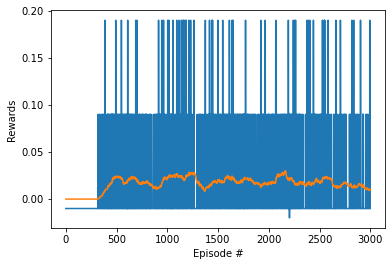

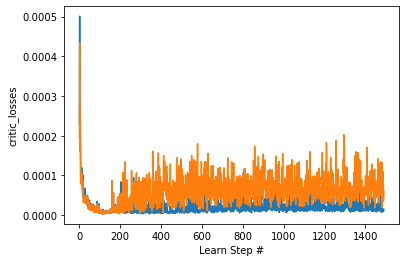

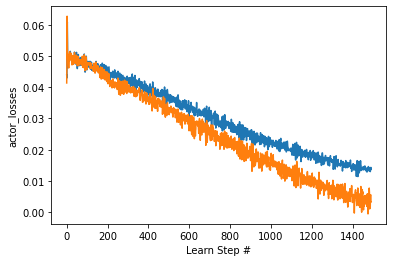

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 256
buffer_size          : 50000
batch_size           : 256
seed                 : 16
max_episodes         : 3000
dropout              : 0.01
learn_every          : 2
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.9999
sigma                : 0.6
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain


Running on device :  cpu
Episode 0 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  1.000 || 0.167 seconds, mem : 15


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 20 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.998 || 0.222 seconds, mem : 299


Episode 40 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.996 || 0.268 seconds, mem : 583


Episode 57 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.002 || Noise  0.994 || 0.197 seconds, mem : 841


Episode 60 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.994 || 0.197 seconds, mem : 883


Episode 80 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.992 || 0.233 seconds, mem : 1167
Episode 82 with 27 steps || Reward : [ 0.1  -0.01] || avg reward :  0.002 || Noise  0.992 || 0.300 seconds, mem : 1209


Episode 91 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.003 || Noise  0.991 || 0.301 seconds, mem : 1356
Episode 93 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.004 || Noise  0.991 || 0.233 seconds, mem : 1401


Episode 100 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.004 || Noise  0.990 || 0.194 seconds, mem : 1500


Episode 107 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.005 || Noise  0.989 || 0.264 seconds, mem : 1615


Episode 113 with 31 steps || Reward : [0.   0.09] || avg reward :  0.006 || Noise  0.989 || 0.318 seconds, mem : 1732
Episode 115 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.007 || Noise  0.988 || 0.217 seconds, mem : 1777


Episode 117 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.008 || Noise  0.988 || 0.300 seconds, mem : 1822


Episode 120 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.009 || Noise  0.988 || 0.332 seconds, mem : 1881


Episode 130 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.987 || 0.282 seconds, mem : 2038


Episode 136 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.011 || Noise  0.986 || 0.397 seconds, mem : 2138


Episode 140 with 26 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.986 || 0.311 seconds, mem : 2208


Episode 142 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.986 || 0.463 seconds, mem : 2253
Episode 144 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.986 || 0.323 seconds, mem : 2297


Episode 146 with 42 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.985 || 0.597 seconds, mem : 2353
Episode 151 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.016 || Noise  0.985 || 0.217 seconds, mem : 2442


Episode 152 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.985 || 0.335 seconds, mem : 2475


Episode 160 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.016 || Noise  0.984 || 0.265 seconds, mem : 2588


Episode 164 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.984 || 0.314 seconds, mem : 2661
Episode 166 with 26 steps || Reward : [ 0.1  -0.01] || avg reward :  0.018 || Noise  0.983 || 0.548 seconds, mem : 2701


Episode 169 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.983 || 0.206 seconds, mem : 2758
Episode 170 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.983 || 0.415 seconds, mem : 2789


Episode 178 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.982 || 0.429 seconds, mem : 2920


Episode 179 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.982 || 0.222 seconds, mem : 2950
Episode 180 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.982 || 0.363 seconds, mem : 2982
Episode 181 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.982 || 0.200 seconds, mem : 3012


Episode 185 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.982 || 0.222 seconds, mem : 3086


Episode 190 with 25 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.981 || 0.280 seconds, mem : 3168


Episode 197 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.980 || 0.230 seconds, mem : 3283


Episode 200 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.024 || Noise  0.980 || 0.264 seconds, mem : 3326
Episode 201 with 30 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.980 || 0.190 seconds, mem : 3356


Episode 208 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.979 || 0.456 seconds, mem : 3472


Episode 211 with 32 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.979 || 0.523 seconds, mem : 3532
Episode 212 with 32 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.979 || 0.447 seconds, mem : 3564


Episode 213 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.979 || 0.344 seconds, mem : 3595


Episode 220 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.978 || 0.304 seconds, mem : 3716


Episode 225 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.978 || 0.250 seconds, mem : 3804


Episode 226 with 30 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.978 || 0.451 seconds, mem : 3834


Episode 237 with 30 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.976 || 0.223 seconds, mem : 4006


Episode 240 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.025 || Noise  0.976 || 0.228 seconds, mem : 4048
Episode 241 with 33 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.976 || 0.293 seconds, mem : 4081


Episode 242 with 32 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.976 || 0.412 seconds, mem : 4113
Episode 244 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.976 || 0.716 seconds, mem : 4158


Episode 245 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.976 || 0.234 seconds, mem : 4189


Episode 252 with 32 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.975 || 0.619 seconds, mem : 4324


Episode 254 with 32 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.975 || 0.947 seconds, mem : 4370


Episode 260 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.025 || Noise  0.974 || 0.215 seconds, mem : 4456
Episode 261 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.974 || 0.246 seconds, mem : 4485


Episode 262 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.974 || 0.715 seconds, mem : 4516
Episode 267 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.974 || 0.216 seconds, mem : 4606


Episode 270 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.973 || 0.379 seconds, mem : 4664
Episode 271 with 32 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.973 || 0.198 seconds, mem : 4696


Episode 273 with 32 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.973 || 0.233 seconds, mem : 4742
Episode 276 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.973 || 0.325 seconds, mem : 4802


Episode 280 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.025 || Noise  0.972 || 0.199 seconds, mem : 4878


Episode 284 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.972 || 0.486 seconds, mem : 4952


Episode 291 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.971 || 0.182 seconds, mem : 5068


Episode 300 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.023 || Noise  0.970 || 1.479 seconds, mem : 5196


Episode 305 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.023 || Noise  0.970 || 0.209 seconds, mem : 5285


Episode 313 with 32 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.969 || 0.255 seconds, mem : 5435


Episode 316 with 32 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.969 || 0.379 seconds, mem : 5504


Episode 320 with 33 steps || Reward : [ 0.   -0.01] || avg reward :  0.020 || Noise  0.968 || 0.415 seconds, mem : 5580


Episode 329 with 32 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.968 || 0.210 seconds, mem : 5725


Episode 332 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.967 || 0.280 seconds, mem : 5782


Episode 338 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.967 || 0.170 seconds, mem : 5884
Episode 340 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.966 || 0.176 seconds, mem : 5930


Episode 348 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.966 || 0.167 seconds, mem : 6060
Episode 349 with 32 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.966 || 0.109 seconds, mem : 6092
Episode 350 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.966 || 0.193 seconds, mem : 6122
Episode 351 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.965 || 0.298 seconds, mem : 6153


Episode 352 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.965 || 0.485 seconds, mem : 6184


Episode 360 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.020 || Noise  0.965 || 0.267 seconds, mem : 6298
Episode 361 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.964 || 0.245 seconds, mem : 6330


Episode 363 with 32 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.964 || 0.183 seconds, mem : 6376
Episode 366 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.964 || 0.304 seconds, mem : 6435
Episode 367 with 32 steps || Reward : [0.1  0.09] || avg reward :  0.021 || Noise  0.964 || 0.177 seconds, mem : 6467


Episode 369 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.964 || 0.229 seconds, mem : 6512


Episode 380 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.963 || 0.417 seconds, mem : 6684
Episode 385 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.962 || 0.222 seconds, mem : 6780


Episode 390 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.962 || 0.399 seconds, mem : 6868


Episode 394 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.961 || 0.362 seconds, mem : 6941


Episode 400 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.020 || Noise  0.961 || 0.485 seconds, mem : 7027


Episode 406 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.960 || 0.357 seconds, mem : 7128


Episode 416 with 27 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.959 || 0.374 seconds, mem : 7283
Episode 420 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.020 || Noise  0.959 || 0.201 seconds, mem : 7339
Episode 421 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.959 || 0.274 seconds, mem : 7370


Episode 423 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.958 || 0.217 seconds, mem : 7417
Episode 424 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.958 || 0.360 seconds, mem : 7449


Episode 430 with 27 steps || Reward : [0.09 0.  ] || avg reward :  0.023 || Noise  0.958 || 0.380 seconds, mem : 7559


Episode 435 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.957 || 0.251 seconds, mem : 7645


Episode 439 with 24 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.957 || 0.146 seconds, mem : 7712
Episode 440 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.022 || Noise  0.957 || 0.200 seconds, mem : 7726
Episode 443 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.957 || 0.181 seconds, mem : 7786


Episode 444 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.956 || 0.310 seconds, mem : 7817
Episode 446 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.956 || 0.493 seconds, mem : 7862
Episode 447 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.956 || 0.171 seconds, mem : 7893


Episode 449 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.956 || 0.301 seconds, mem : 7938


Episode 454 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.956 || 0.405 seconds, mem : 8025
Episode 458 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.955 || 0.346 seconds, mem : 8099


Episode 459 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.955 || 0.341 seconds, mem : 8128
Episode 460 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.025 || Noise  0.955 || 0.290 seconds, mem : 8143
Episode 461 with 30 steps || Reward : [ 0.1  -0.02] || avg reward :  0.025 || Noise  0.955 || 0.194 seconds, mem : 8173
Episode 462 with 32 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.955 || 0.380 seconds, mem : 8205


Episode 463 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.955 || 0.279 seconds, mem : 8236
Episode 465 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.954 || 0.166 seconds, mem : 8280


Episode 479 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.953 || 0.213 seconds, mem : 8493


Episode 480 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.024 || Noise  0.953 || 0.218 seconds, mem : 8508
Episode 485 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.953 || 0.187 seconds, mem : 8595


Episode 492 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.952 || 0.328 seconds, mem : 8720
Episode 493 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.952 || 0.253 seconds, mem : 8750
Episode 494 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.952 || 0.314 seconds, mem : 8778


Episode 496 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.952 || 0.313 seconds, mem : 8823
Episode 500 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.026 || Noise  0.951 || 0.212 seconds, mem : 8880
Episode 501 with 31 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.951 || 0.211 seconds, mem : 8911


Episode 502 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.951 || 0.378 seconds, mem : 8941
Episode 507 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.950 || 0.181 seconds, mem : 9027


Episode 509 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.950 || 0.197 seconds, mem : 9070


Episode 513 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.950 || 0.222 seconds, mem : 9143


Episode 520 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.029 || Noise  0.949 || 0.199 seconds, mem : 9243
Episode 523 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.949 || 0.220 seconds, mem : 9301
Episode 524 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.028 || Noise  0.949 || 0.331 seconds, mem : 9334


Episode 527 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.949 || 0.231 seconds, mem : 9400
Episode 531 with 37 steps || Reward : [0.1  0.09] || avg reward :  0.029 || Noise  0.948 || 0.191 seconds, mem : 9480


Episode 533 with 30 steps || Reward : [0.   0.09] || avg reward :  0.030 || Noise  0.948 || 0.234 seconds, mem : 9524


Episode 537 with 32 steps || Reward : [0.   0.09] || avg reward :  0.030 || Noise  0.948 || 0.298 seconds, mem : 9612


Episode 538 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.948 || 0.699 seconds, mem : 9642
Episode 540 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.030 || Noise  0.947 || 0.352 seconds, mem : 9670
Episode 542 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.947 || 0.410 seconds, mem : 9714


Episode 543 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.947 || 0.205 seconds, mem : 9743
Episode 544 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.947 || 0.304 seconds, mem : 9773


In [ ]:
from maddpg import maddpg
import cProfile
DoProfile = False

config = {
    'gamma'               : 0.99,
    'tau'                 : 0.01,
    'action_size'         : action_size,
    'state_size'          : state_size,
    'hidden_size'         : 256,
    'buffer_size'         : 50000,
    'batch_size'          : 256,
    'seed'                : 6,
    'max_episodes'        : 3000,
    'dropout'             : 0.01,      # currently not active
    'learn_every'         : 2,
    'critic_learning_rate': 1e-3,
    'actor_learning_rate' : 1e-3,
    'noise_decay'         : 0.9999,
    'sigma'               : 0.6,
    'num_agents'          : num_agents,
    'env_file_name'       : env_file_name,
    'train_mode'          : True,
    'brain_name'          : brain_name}

def print_config(config):
    print('Config Parameters    : ')
    for c,k in config.items():
        print('{:20s} : {}'.format(c,k))

config_list = []
result_list = []
var_range = []
# batch = [512,1024]
# nd = [0.999, 0.998]
# for l in learn:
    # for b in batch:
        # var_range.append([l,b])
        # for h in hidden:
            # for n in nd:
var_range = [0.9999, 0.99995, 0.999975] # , 0.6, 0.7, 0.8] #, 0.45, 0.5]
# var_range = [0.9998, 0.9999, 0.99995] # , 0.0003, 0.0005, 0.001]# [0.2, 0.25, 0.3]
selected_seeds = [8,16] # [7,9,13,15]
# num_runs = 10
for param in range(len(var_range)):
    alt_config = config.copy()
    alt_config['noise_decay'] = var_range[param]
    # alt_config['noise_scale_trigger'] = var_range[param]
    # alt_config['actor_learning_rate'] = var_range[param]
    # alt_config['learn_every_low'] = var_range[param][0]
    num_runs = len(selected_seeds)
    for main in range(num_runs):#len(tau_range)):
        print('-------------------------------------')
        print('New Run :')
        print('-------------------------------------')
        # alt_config['seed'] += 1
        alt_config['seed'] = selected_seeds[main]
        print_config(alt_config)
        config_list.append(alt_config.copy())
        agent = maddpg(env, alt_config)
        if DoProfile:cProfile.run("results = agent.train()",'PerfStats')
        else:results = agent.train()
        result_list.append(results)
        # all_rewards,avg_rewards,critic_losses,actor_losses = agent.train()
        print_config(alt_config)
        plot_results(results)
print('-------------------------------------')
print('-------------------------------------')
print('Summary :')
print('-------------------------------------')
print('-------------------------------------')
for param in range(len(var_range)):
    for main in range(num_runs):
        print_config(config_list[param*num_runs+main])
        plot_results(result_list[param*num_runs+main])
    
env.close()

# 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```